# Predicting the Price of a House Based on Various Predictors

### Introduction

It is no secret that the price of housing in the United States has skyrocketed in the past decade. Homeowners are continuously struggling to find a suitable home for their specific needs, that is within their personal budget. In this data science project, we are trying to determine:

Is it possible to predict the cost of a house based on area, number of bedrooms, number of bathrooms and number of stories?

The dataset being used for this analysis is called: Housing Prices Dataset which was obtained from Kaggle and contains data from 2021. The original dataset contained 13 columns, 1 of which is the price.


### Preliminary Exploratory Data Analysis
Below we have gotten our data from the web onto R, and have split our data in to training and testing data, with a 75/25 ratio

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

set.seed(9999)


Housing <- read_csv("https://raw.githubusercontent.com/jio7887oij/dsci-100-009-1/main/Housing.csv")

housing_split <- initial_split(Housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)
housing_train_visualization <- head(housing_train, n = 10)
housing_train_visualization 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished
3430000,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished
3395000,3640,2,1,1,yes,no,no,no,no,0,no,furnished
3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished


Modify the dataset based on proposal.

In [3]:
Housing <- Housing |>
    select(price, area, bedrooms, bathrooms, stories)

### Visualizing the Relationship between the Predictor Variables and the Response Variable
Box-plots and bar graphs are created for the purpose of exploring the relationship between the predictor variables and the response variables.

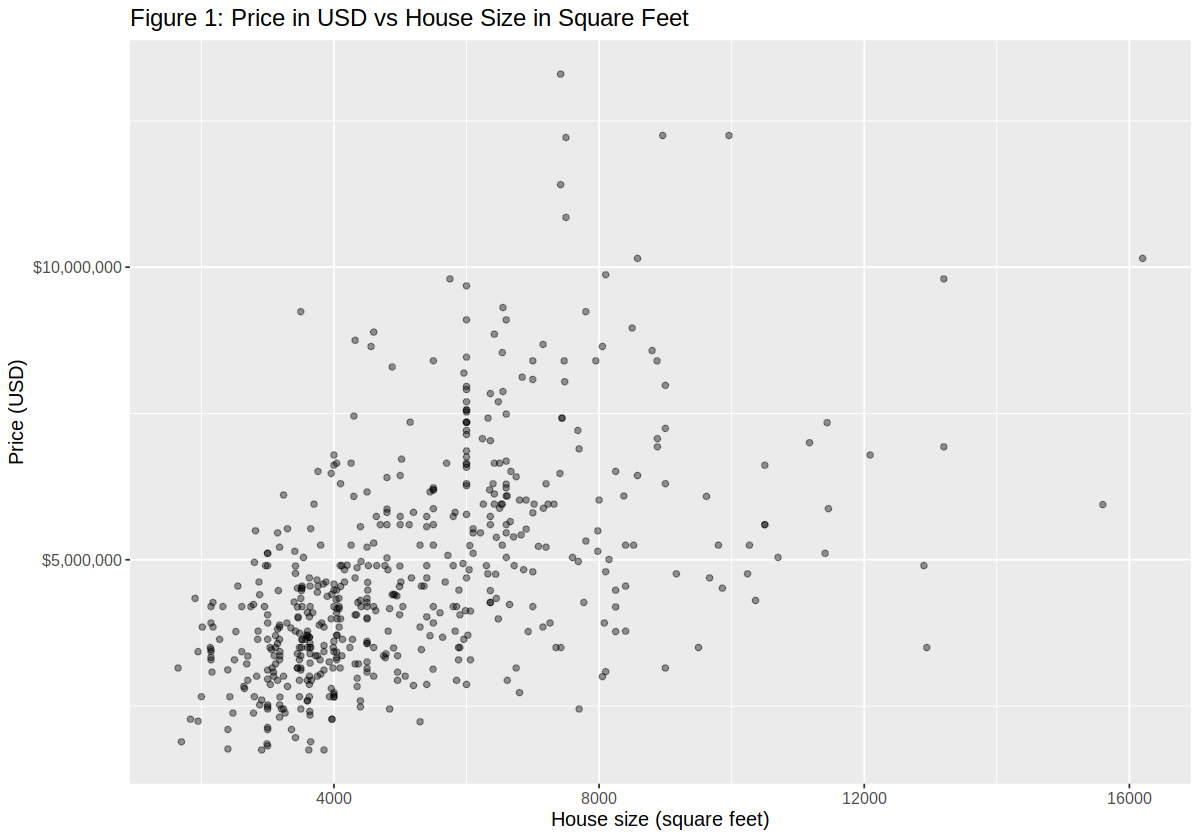

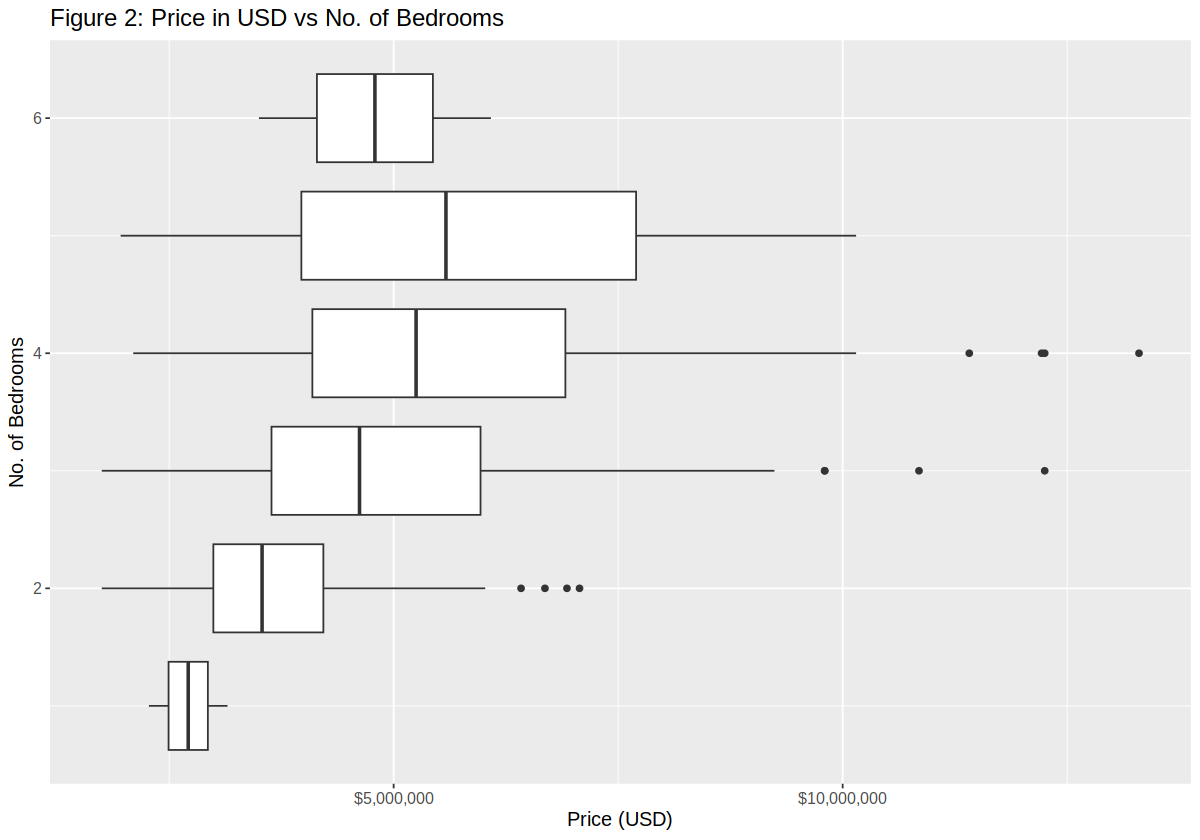

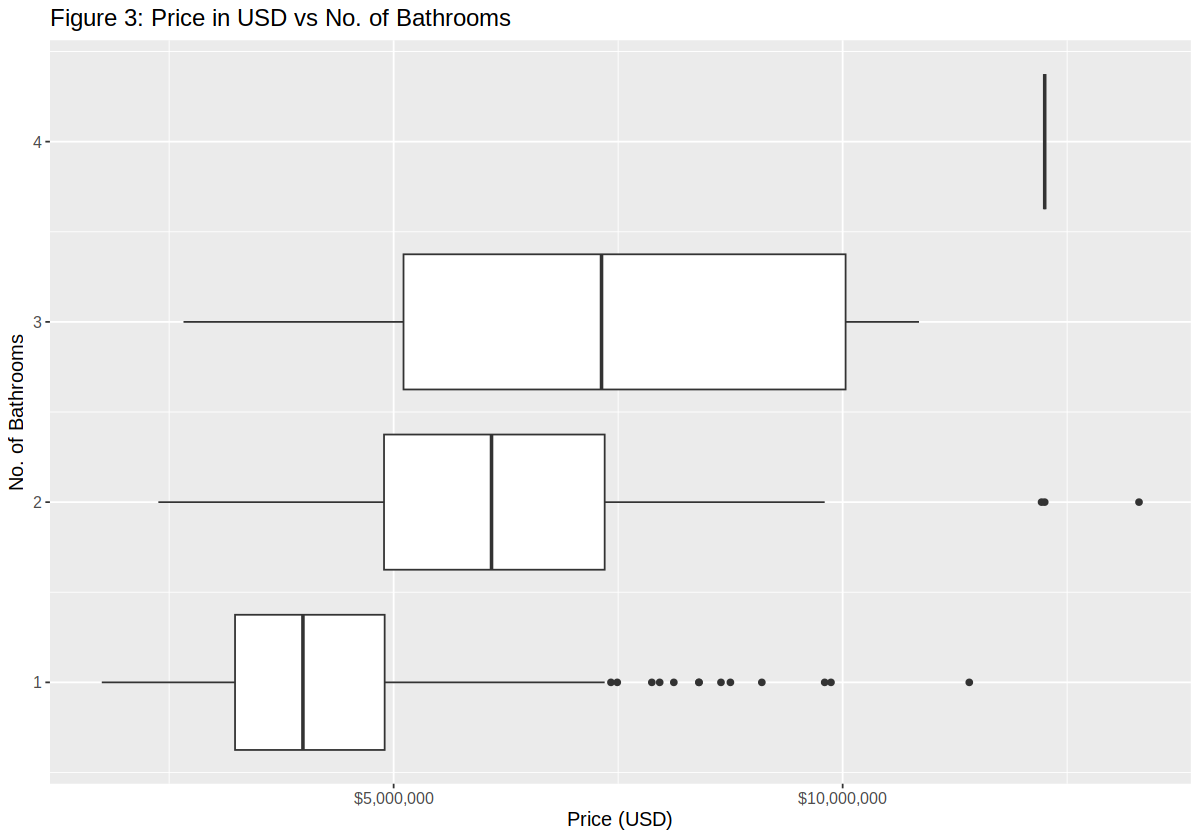

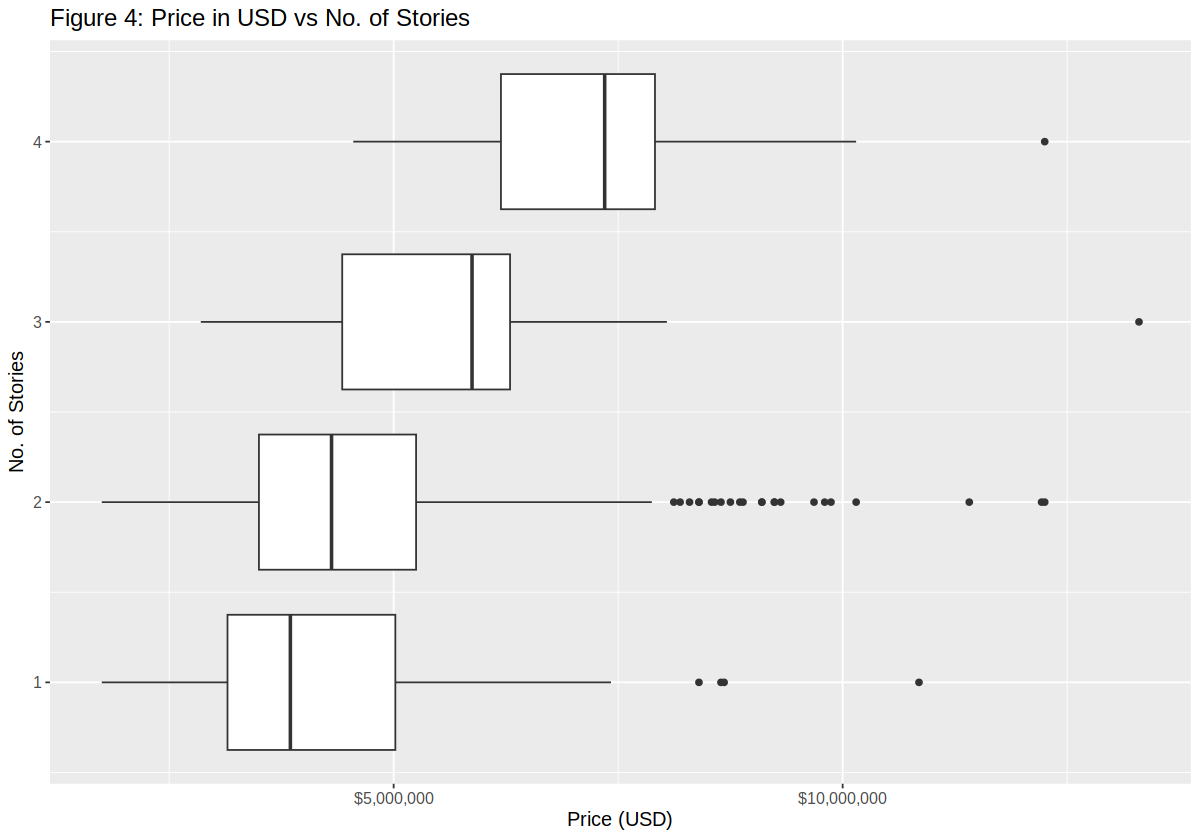

In [4]:
set.seed(9999)
preview_1 <- ggplot(Housing, aes(x = area, y = price)) +
  geom_point(alpha = 0.4) +
  ggtitle("Figure 1: Price in USD vs House Size in Square Feet") +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_1

preview_2 <- ggplot(Housing, aes(x = bedrooms, y = price, group = bedrooms)) +
  geom_boxplot() +
  ggtitle("Figure 2: Price in USD vs No. of Bedrooms") +
  xlab("No. of Bedrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_2 + coord_flip()

preview_3 <- ggplot(Housing, aes(x = bathrooms, y = price, group = bathrooms)) +
  geom_boxplot() +
  ggtitle("Figure 3: Price in USD vs No. of Bathrooms") +
  xlab("No. of Bathrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_3 + coord_flip()

preview_4 <- ggplot(Housing, aes(x = stories, y = price, group = stories)) +
  geom_boxplot() +
  ggtitle("Figure 4: Price in USD vs No. of Stories") +
  xlab("No. of Stories") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_4 + coord_flip()

### Observation 1
In Figure 1, the scatter plot shows a strong, positive relationship between the predictor variable, house area and the response variable, house prices. As shown, increased house area results in increasing house prices.

In Figure 2, there are only a few black points that fall out of the white boxes. Also,  the white boxes are small in width with each vertical black line in the white box far from each other. Therefore, it is suggested that there is a very strong, positive relationship between the predictor variable, number of bedrooms and the response variable, house prices.

In Figure 3, there are more black points that fall out of the white boxes and each white box is also wider compared to Figure 2. However, the vertical black line in the white boxes is more distantly from each other, suggesting there is a strong, positive relationship between the predictor variable, number of bathrooms and the response variable, house prices.

In Figure 4, there are even more black points that fall out of the white boxes but each white box is narrower compared to Figure 3. The vertical black lines in the white boxes are also very distantly from each other, indicating a moderate, positive relationship between the predictor variable, number of stories and the response variable, house prices.

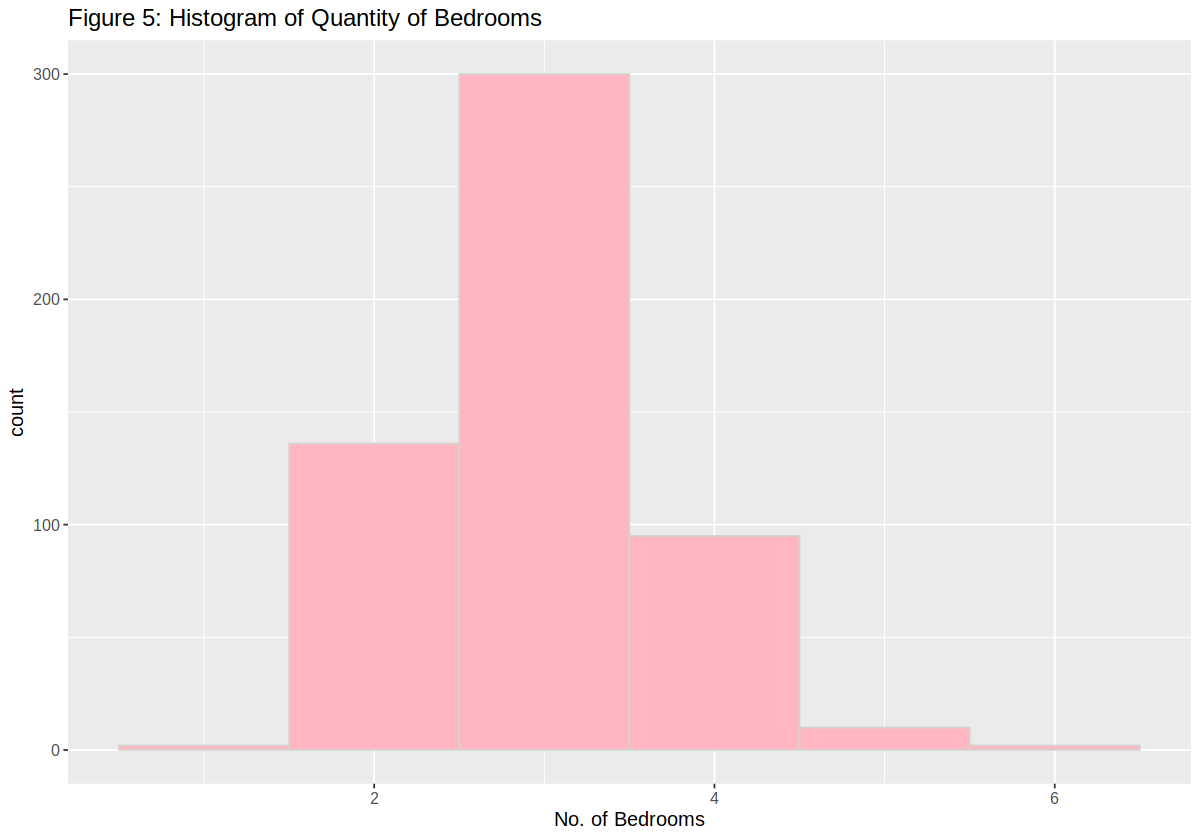

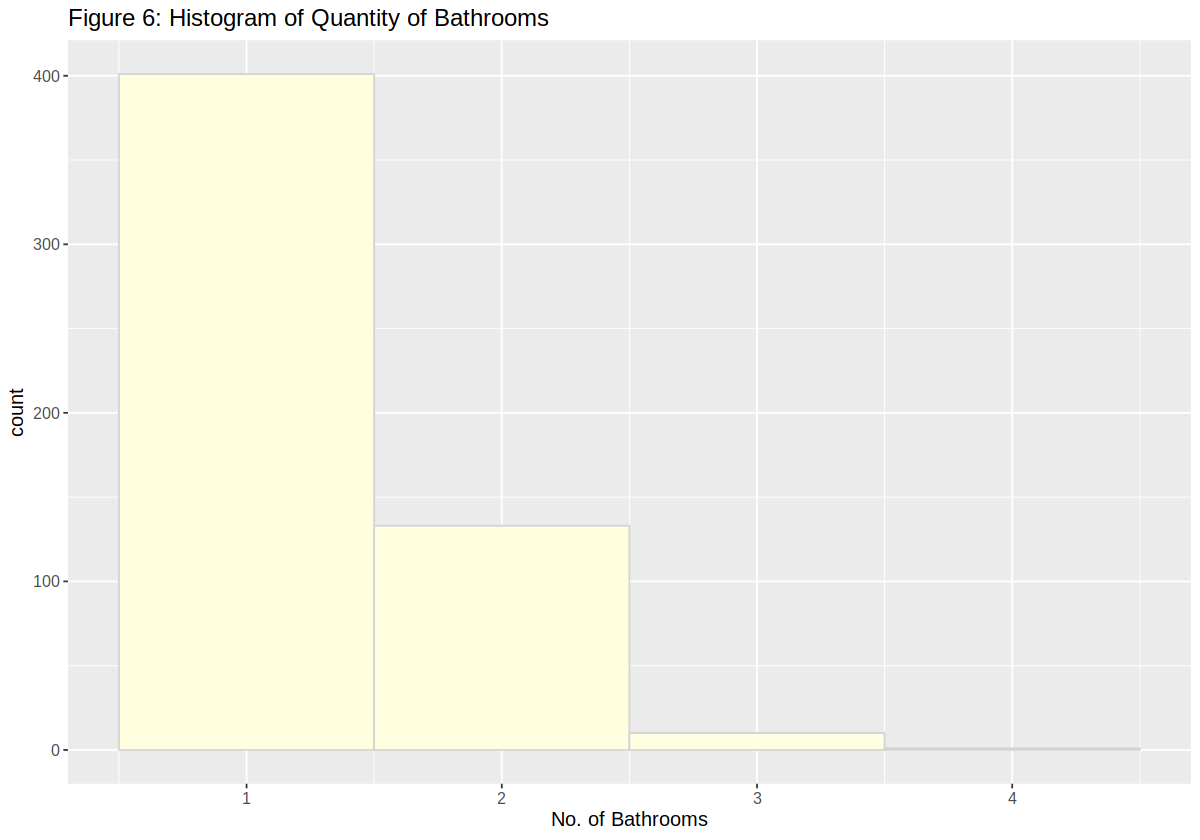

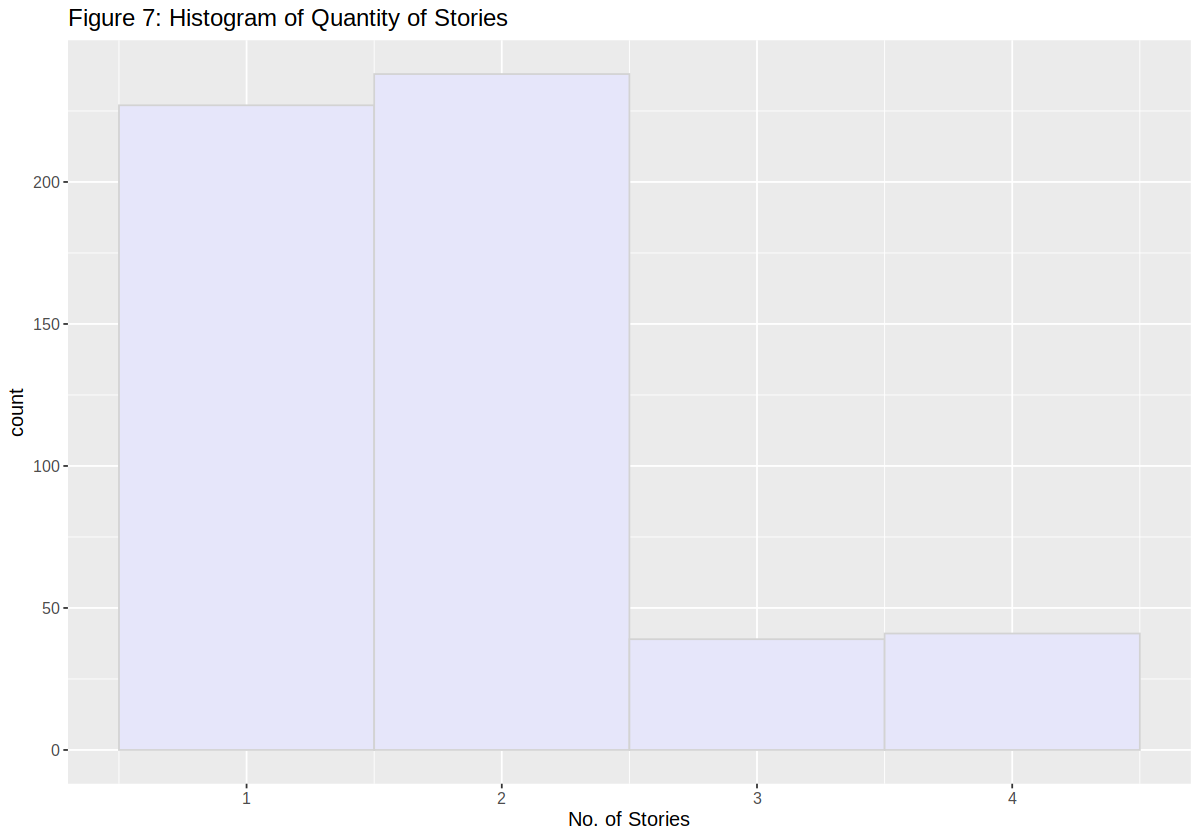

In [5]:
set.seed(9999)
bedroom_hg <-  ggplot(Housing, aes(x = bedrooms)) +
  geom_histogram(fill = "lightpink", color = "lightgrey", binwidth = 1) +
  ggtitle("Figure 5: Histogram of Quantity of Bedrooms") +
  xlab("No. of Bedrooms") +
  theme(text = element_text(size = 12))

bedroom_hg

bathroom_hg <-  ggplot(Housing, aes(x = bathrooms)) +
  geom_histogram(fill = "lightyellow", color = "lightgrey", binwidth = 1) +
  ggtitle("Figure 6: Histogram of Quantity of Bathrooms") +
  xlab("No. of Bathrooms") +
  theme(text = element_text(size = 12))
bathroom_hg

stories_hg <-  ggplot(Housing, aes(x = stories)) +
  geom_histogram(fill = "lavender", color = "lightgrey", binwidth = 1) +
  ggtitle("Figure 7: Histogram of Quantity of Stories") +
  xlab("No. of Stories") +
  theme(text = element_text(size = 12))
stories_hg

### Observation 2
In Figure 5, the histogram demonstrated a distribution with most data concentrated in the middle, where the number of bedrooms is equal to 2,3 and 4. There is nearly no data when the number of bedrooms equals 1,5 and 6.

In Figure 6, most data are concentrated in the first bar where the number of bathrooms is equal to 1. There is also one-fourth of the data point counts when the number of bathrooms is equal to 2. There is nearly no data when the number of bathrooms equals 3 and 4.

In Figure 7, when the number of stories equals 1 and 2, they each have about 250 counts of data points. When the number of stories equals 3 and 4, they each have less than 50 counts. 


### Selecting Predictor Variables

Based on the above graphs, we decided to use house area and number of bedrooms as predictor variables to predict the house price. These have been chosen since there are plenty of data points and a strong correlation between them and the response variable.


### Performing Data Analysis

Due to the lack of data, we have decided to exclude 1,5 and 6 bedrooms from our analysis and use the 2,3 and 4 bedrooms data for our linear regression analysis.


In [12]:
set.seed(9999)
HousingSort <- Housing |>
    select(price, area, bedrooms) |>
    group_by(price, area) |>
    arrange(bedrooms) |>
    filter(bedrooms > 1 , bedrooms < 5)

HousingSortHead <- head(HousingSort, n = 10)
HousingSortHead
HousingSortTail <- tail(HousingSort, n = 10)
HousingSortTail

price,area,bedrooms
<dbl>,<dbl>,<dbl>
7070000,8880,2
6930000,13200,2
6685000,6600,2
6419000,6750,2
6020000,6800,2
5600000,10500,2
5285000,4600,2
5110000,11410,2
5075000,5720,2


price,area,bedrooms
<dbl>,<dbl>,<dbl>
3290000,3480,4
3290000,3792,4
3234000,3640,4
3010000,3630,4
2975000,4352,4
2940000,3660,4
2870000,5400,4
2852500,5200,4
2380000,2787,4


In [13]:
set.seed(9999)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(price ~ area + bedrooms, data = housing_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = housing_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         area     bedrooms  
   736432.7        379.1     700095.9  


In [14]:
set.seed(9999)
lm_mult_test_results <- lm_fit |>
    predict(housing_test) |>
    bind_cols(housing_test) |>
    metrics(truth = price, estimate = .pred)

lm_mult_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.552311e+06
rsq,standard,4.820625e-01
mae,standard,1.130012e+06


In [15]:
set.seed(9999)
mcoeffs <- lm_fit |>
    extract_fit_parsnip() |>
    tidy()
mcoeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),736432.665,320270.78162,2.299406,2.199121e-02
area,379.105,35.16079,10.782039,5.420518e-24
bedrooms,700095.870,97533.72084,7.177988,3.416407e-12


### Creating One Graph With 3 best-fit lines.

After performing linear regression, β2, the slope of the house area is determined. Without changing β2 and plugging the actual number (eg. 2,3, and 4) of bedrooms into the equation, the "β2 ⋅ ( number of bedrooms )" now becomes a number. Thus, three best-fit lines with only "house size" as a variable are created below.



House Sale Price = β0 + β1
⋅
(
house size
)
+
β2
⋅
(
number of bedrooms
)


House Sale Price = 736432.655 + 379.105*(House Area) + 700095.870*(Number of Bedrooms)

House Sale Price(2 Rooms) = 2136624.395 + 379.105*(House Area)

House Sale Price(3 Rooms) = 2836720.265 + 379.105*(House Area)

House Sale Price(4 Rooms) = 3536816.135 + 379.105*(House Area)

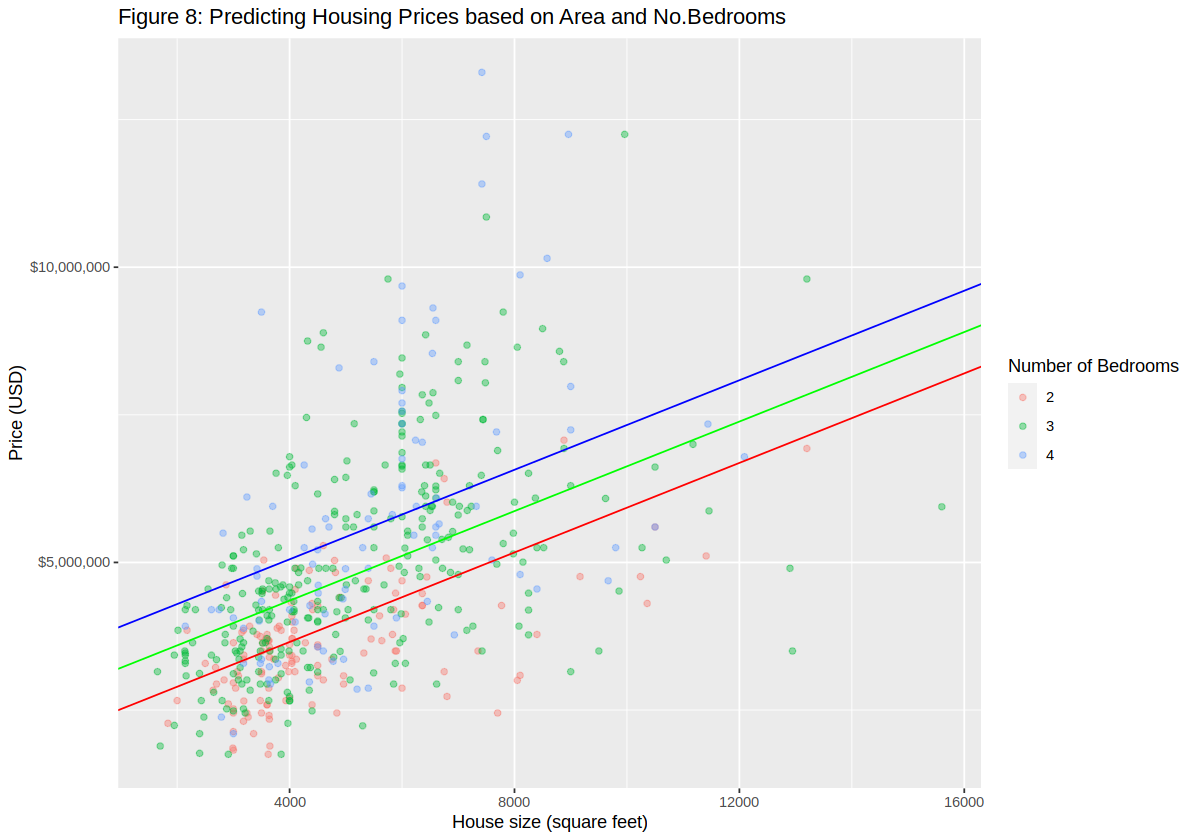

In [16]:
set.seed(9999)

options(repr.plot.width = 10, repr.plot = 6)

housing_plot_final <- ggplot(HousingSort, aes(x = area, y = price, colour = factor(bedrooms))) +
  geom_point(alpha = 0.4) +
  geom_abline(intercept = 2136624.395, slope = 379.105, color = "red") +
  geom_abline(intercept = 2836720.265, slope = 379.105, color = "green") +
  geom_abline(intercept = 3536816.135, slope = 379.105, color = "blue") +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 11)) +
  ggtitle("Figure 8: Predicting Housing Prices based on Area and No.Bedrooms")

housing_plot_final +
    labs(
     colour = "Number of Bedrooms")